# <font color='red'>Assignment - Model Selection:</font>

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       #Plotting the data
import seaborn as sns                 #plotting the data

In [2]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=FutureWarning)

# 1. Load the dataset into python environment

In [3]:
#Read the dataset and display

data = pd.read_csv(r'C:\Users\HP\Desktop\Python DSA\assignments\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Do all the necessary pre-processing steps

In [4]:
#making passengerid as index column and display

data.set_index('PassengerId',inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Check number of rows and columns of the dataset

data.shape

(891, 11)

In [6]:
# some basic statistical analysis about the data

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#type of each columns in the data

data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


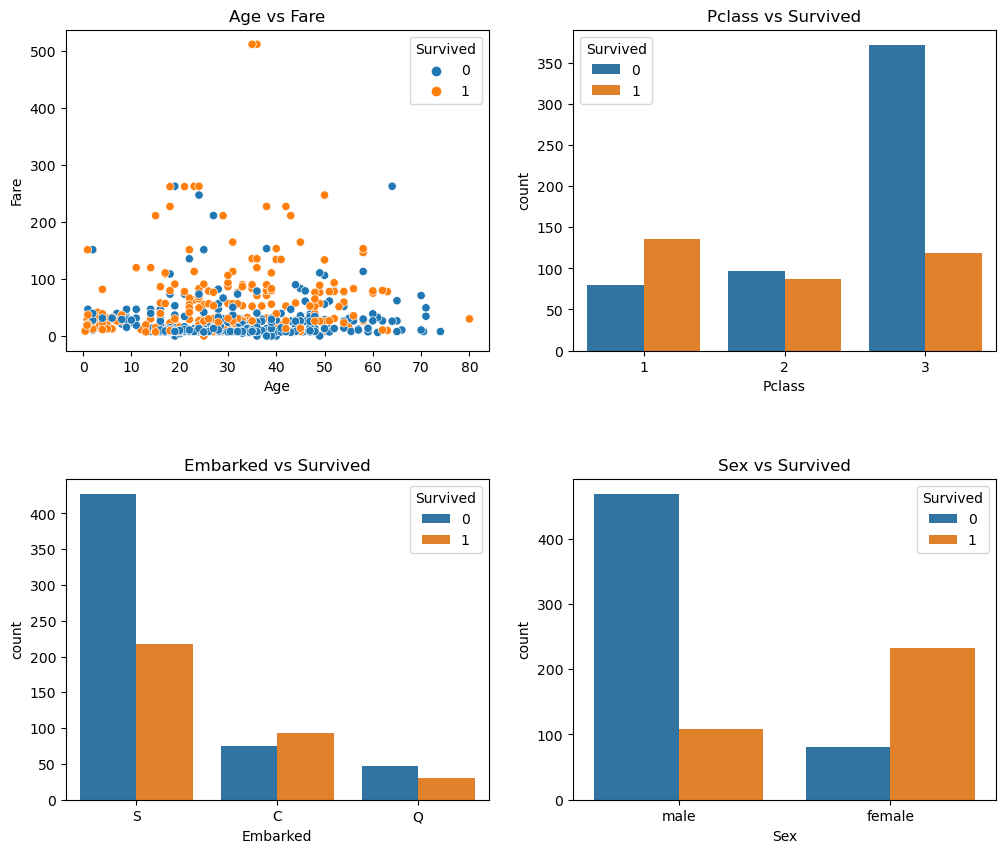

In [9]:
# Explore the relationship between variables in the dataset:

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
plt.subplots_adjust(hspace=0.4)

# Scatter plot for numerical variables
sns.scatterplot(ax=axes[0, 0], x='Age', y='Fare', hue='Survived', data=data)
axes[0, 0].set_title('Age vs Fare')


# Bar plot of pclass and survived
sns.countplot(ax=axes[0, 1], x='Pclass', hue='Survived', data=data)
axes[0, 1].set_title('Pclass vs Survived')

# Bar plot of sex vs survived
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Sex vs Survived')

# Bar plot of Embarked vs Survived
sns.countplot(ax=axes[1, 0], x='Embarked', hue='Survived', data=data)
axes[1, 0].set_title('Embarked vs Survived')


# Display the plot
plt.show()






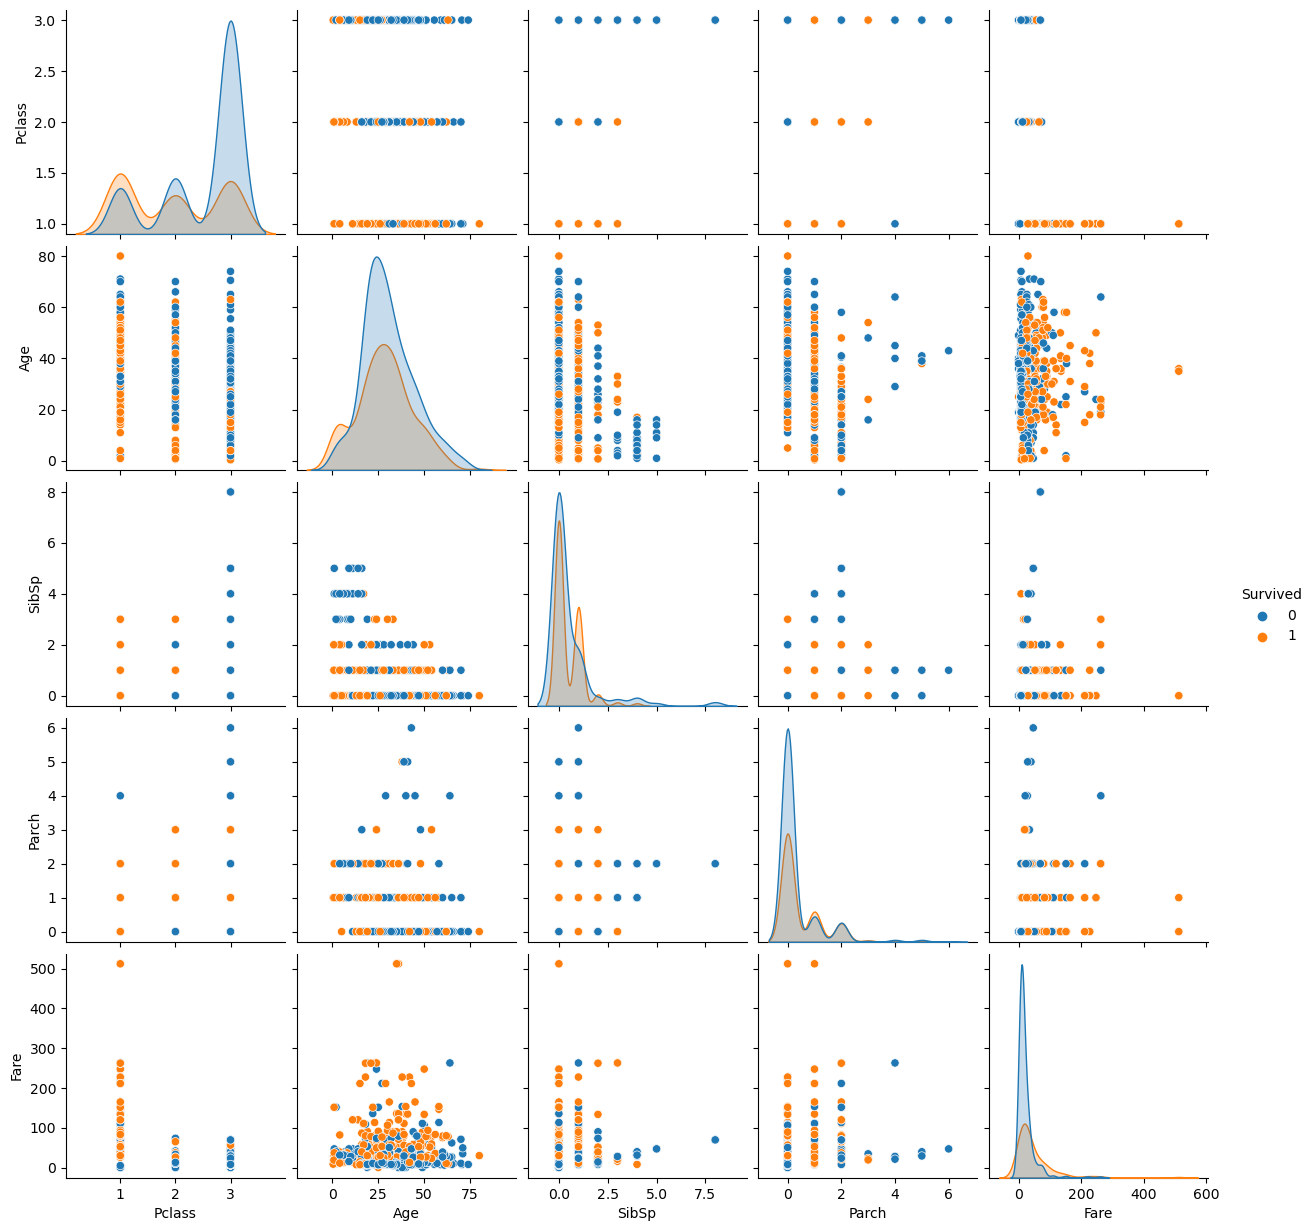

In [10]:
#visualization of the data

sns.pairplot(data,hue='Survived')

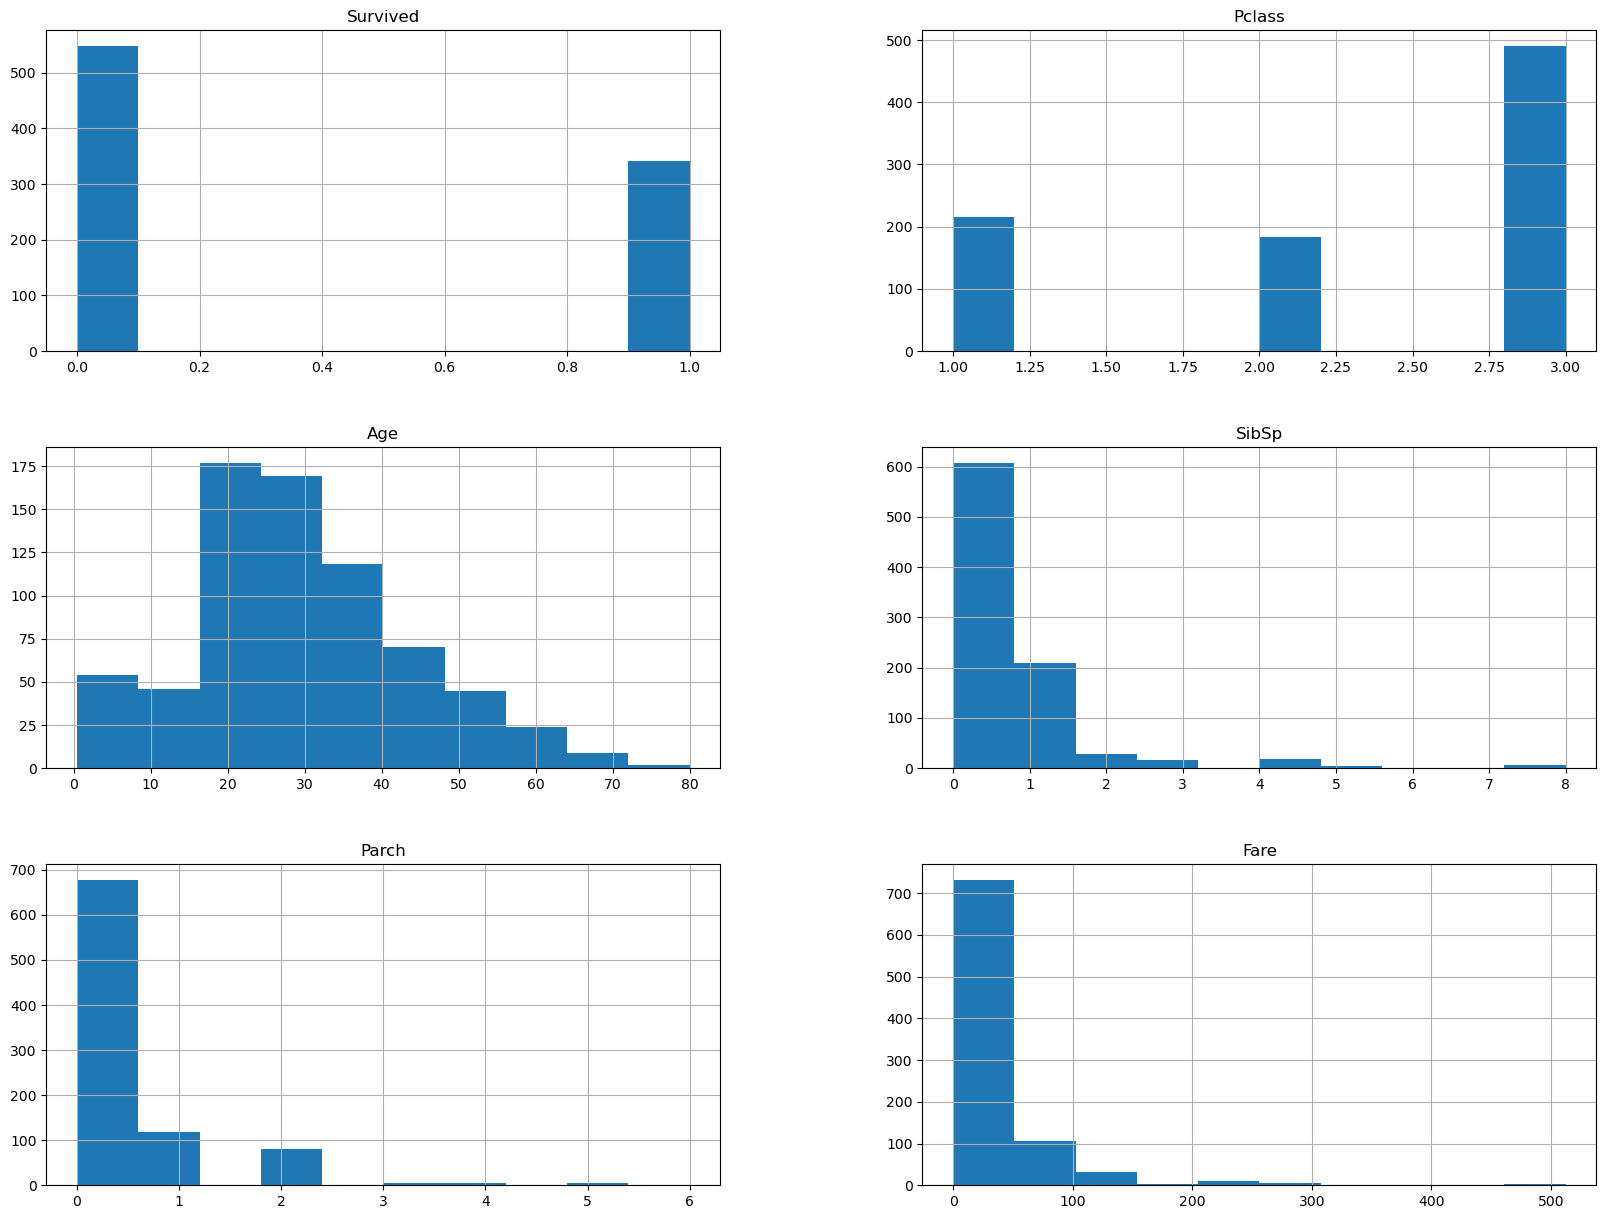

In [11]:
#plot graphs for all float and int data types

fregraph = data.select_dtypes(include=['float','int'])
fregraph.hist(figsize=(20,15))
plt.show()

In [12]:
#display the columns of the data

data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
#display type of the data

type(data)

pandas.core.frame.DataFrame

In [14]:
#count the null values of the data

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
#filling the missing values in the column cabin and embarked with mode value

for col in ['Cabin','Embarked']:
    data[col]=data[col].fillna(data[col].mode()[0])
    
    
#filling the missing values in the column age with median value


data['Age']=data['Age'].fillna(data['Age'].median())    
    

In [16]:
#after filling the missing values count the null values of the data

data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

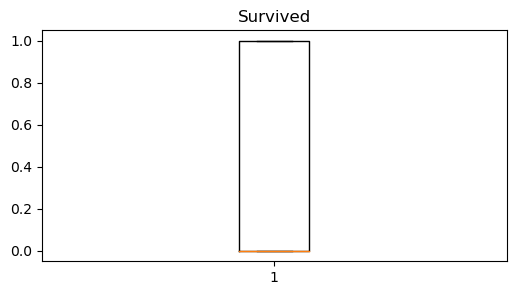

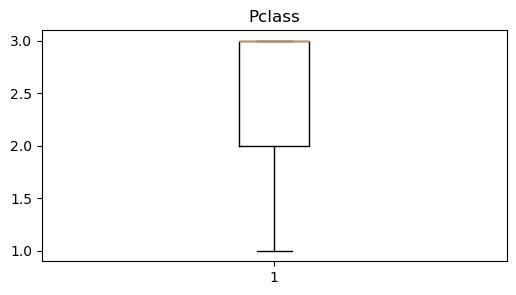

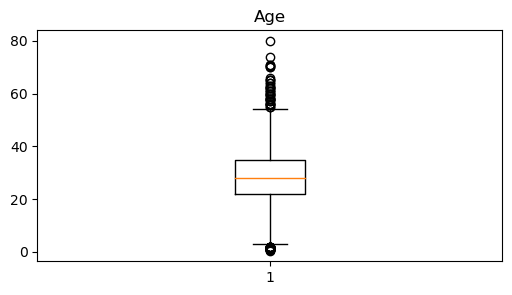

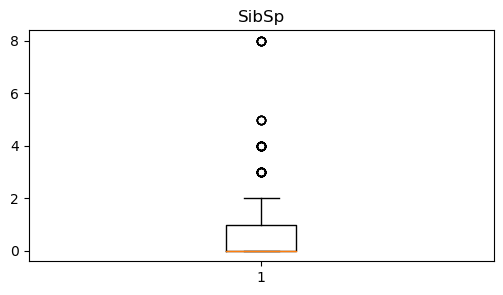

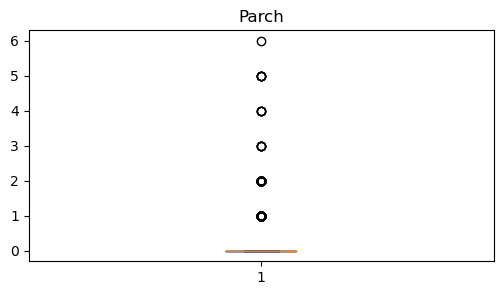

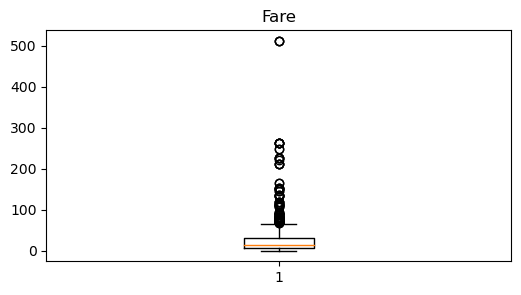

In [17]:
#to check the outliers create boxplots

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for i in num_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(data[i])
    plt.title(i)

In [18]:
#finding the quartiles for age column

Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')


#print the quartiles

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)


#Calculating interquartile range(IQR)

IQR = Q3-Q1

#print iqr

print('IQR =',IQR)


#setting upper limit & lower limit for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim =',up_lim)
print('low_lim =',low_lim)


Q1 = 22.0
Q2 = 28.0
Q3 = 35.0
IQR = 13.0
up_lim = 54.5
low_lim = 2.5


In [19]:
#by using flooring and capping handle the outliers

data['Age'] = np.where(data['Age']>up_lim,up_lim,np.where(data['Age']<low_lim,low_lim,data['Age']))


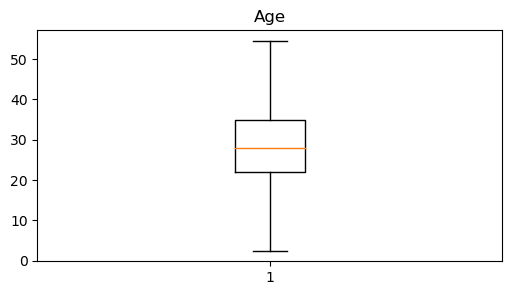

In [20]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()

In [21]:
#finding the quartiles for sibsp column

Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')


#print the quartiles

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)


#Calculating interquartile range(IQR)

IQR = Q3-Q1

#print iqr

print('IQR =',IQR)


#setting upper limit & lower limit for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim =',up_lim)
print('low_lim =',low_lim)


Q1 = 0.0
Q2 = 0.0
Q3 = 1.0
IQR = 1.0
up_lim = 2.5
low_lim = -1.5


In [22]:
#by using flooring and capping handle the outliers

data['SibSp'] = np.where(data['SibSp']>up_lim,up_lim,np.where(data['SibSp']<low_lim,low_lim,data['SibSp']))

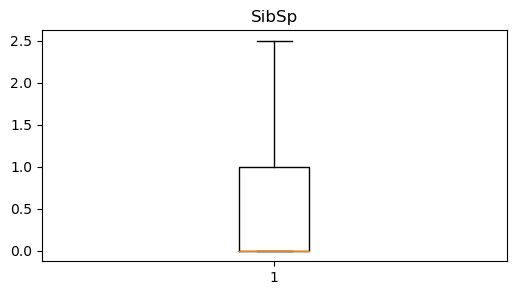

In [23]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['SibSp'])
plt.title('SibSp')
plt.show()

In [24]:
#finding the quartiles for Fare column

Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

#print the quartiles

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)


#Calculating interquartile range(IQR)

IQR = Q3-Q1

#print iqr

print('IQR =',IQR)


#setting upper limit & lower limit for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim =',up_lim)
print('low_lim =',low_lim)


Q1 = 7.9104
Q2 = 14.4542
Q3 = 31.0
IQR = 23.0896
up_lim = 65.6344
low_lim = -26.724


In [25]:
#by using flooring and capping handle the outliers

data['Fare'] = np.where(data['Fare']>up_lim,up_lim,np.where(data['Fare']<low_lim,low_lim,data['Fare']))

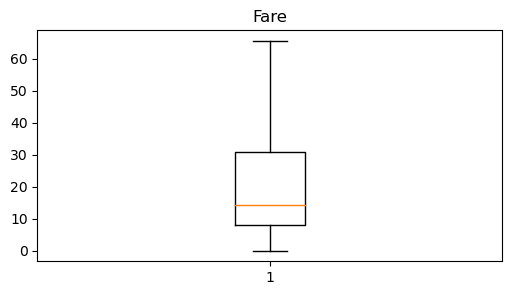

In [26]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show()

# Correlation Heatmap

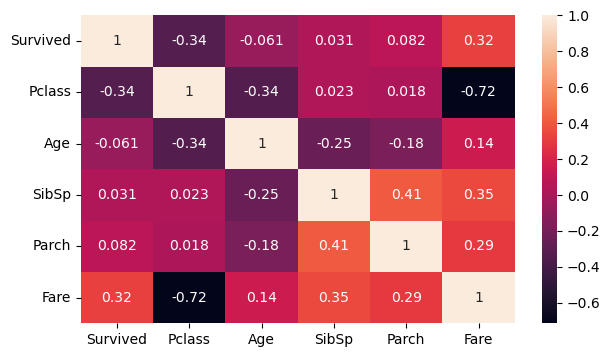

In [27]:
corrmatrix = data.corr()
plt.figure(figsize=(7,4))
sns.heatmap(corrmatrix,annot=True)
plt.show()

In [28]:
#checking the distribution of the target variable

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Encoding the data set

In [29]:
#for preprocessing import,

from sklearn.preprocessing import LabelEncoder 

In [30]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
#perform label encoding

le = LabelEncoder()

data['Embarked'] = le.fit_transform(data['Embarked'])
data['Sex'] = le.fit_transform(data['Sex'])

In [33]:
data['Embarked'].unique()

array([2, 0, 1])

In [34]:
data['Sex'].unique()

array([1, 0])

In [35]:
#display data after encoding

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,B96 B98,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,B96 B98,2


In [36]:
data.shape

(891, 11)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    int32  
dtypes: float64(3), int32(2), int64(3), object(3)
memory usage: 76.6+ KB


In [38]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3. Create kNN and SVM models 

In [39]:
#splitting data into feature(X) and target(y)

X = data.drop(['Survived','Name','Ticket','Cabin'],axis=1)  #independent variable and unnecessary columns
y = data['Survived']     #dependent variable

In [40]:
#hold out techniques
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# <font color='blue'> k-Nerarest Neighbors(kNN) model</font>

In [41]:
#import analysis of classification algorithm

from sklearn.metrics import accuracy_score

#import classification algorithm
from sklearn.neighbors import KNeighborsClassifier

#initialize the list to store accuracy scores
metric = []
neighbors = np.arange(3,15)  #set the desired range

for k in neighbors:
    knnclf = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2) 
    knnclassifier=knnclf.fit(X_train,y_train)
    y_pred_knn = knnclf.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

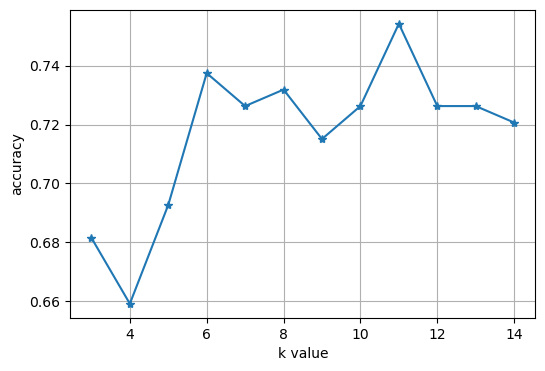

In [42]:
#plot for k values and corresponding accuracy metric

plt.figure(figsize=(6,4))
plt.plot(neighbors,metric,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [43]:
#give k value from the plot

knn_classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski',p=2) 

#Hold out techniques
#train the kNN classifier
knn_classifier.fit(X_train,y_train)

#make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

#print accuracy value
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))

Accuracy =  0.7541899441340782


# <font color='blue'> Support Vector Machines(SVM) model</font>

In [44]:
#import classification algorithm

from sklearn.svm import SVC

svmclf = SVC(kernel='linear')

#Hold out techniques
#train the SVM classifier
svmmodel = svmclf.fit(X_train,y_train)

#make predictions on the test set
y_pred_svm = svmclf.predict(X_test)

#print accuracy value
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.7821229050279329


# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

# <font color='blue'> K - Fold Cross Validation</font>

 <font color='green'>1.For kNN</font>

In [45]:
# for model selection,import

from sklearn.model_selection import KFold,cross_val_score

kfold_validator = KFold(11)


In [46]:
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

In [47]:
kcv_result_knn = cross_val_score(knnclf,X,y,cv=kfold_validator)
print(kcv_result_knn)

[0.64197531 0.65432099 0.7037037  0.74074074 0.71604938 0.71604938
 0.71604938 0.74074074 0.72839506 0.80246914 0.74074074]


In [48]:
np.mean(kcv_result_knn)

0.7182940516273848

In [49]:
print('kNN KFold Average Accuracy: ',np.mean(kcv_result_knn))

kNN KFold Average Accuracy:  0.7182940516273848


<font color='green'>2.For SVM</font>

In [50]:
kfold_validator = KFold(11)
kcv_result_svm = cross_val_score(svmclf,X,y,cv=kfold_validator)
print(kcv_result_svm)

[0.80246914 0.82716049 0.77777778 0.77777778 0.83950617 0.7654321
 0.77777778 0.71604938 0.79012346 0.79012346 0.79012346]


In [51]:
np.mean(kcv_result_svm)

0.7867564534231201

In [52]:
print('SVM KFold average accuracy: ',np.mean(kcv_result_svm))

SVM KFold average accuracy:  0.7867564534231201


#  <font color='blue'>Stratified K Fold Cross Validation</font>

<font color='green'>1.For kNN</font>

In [53]:
# for model selection,import

from sklearn.model_selection import StratifiedKFold

skfold_validator = StratifiedKFold(n_splits = 11)

In [54]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

In [55]:
skcv_result_knn = cross_val_score(knnclf,X,y,cv=skfold_validator)
print(skcv_result_knn )

[0.64197531 0.62962963 0.67901235 0.79012346 0.74074074 0.7037037
 0.72839506 0.74074074 0.74074074 0.77777778 0.72839506]


In [56]:
np.mean(skcv_result_knn)

0.7182940516273848

In [62]:
print('kNN Stratified Average Accuracy: ',np.mean(skcv_result_knn))

kNN Stratified Average Accuracy:  0.7182940516273848


<font color='green'>2.For SVM</font>

In [58]:
skfold_validator = StratifiedKFold(11)
skcv_result_svm = cross_val_score(svmclf,X,y,cv=skfold_validator)
print(skcv_result_svm)

[0.82716049 0.77777778 0.79012346 0.79012346 0.85185185 0.7654321
 0.75308642 0.75308642 0.7654321  0.81481481 0.7654321 ]


In [59]:
np.mean(skcv_result_svm)

0.7867564534231201

In [63]:
print('SVM Stratified average accuracy: ',np.mean(skcv_result_svm))

SVM Stratified average accuracy:  0.7867564534231201


comparitively SVM KFold  and SVM Stratified have highest accuracy